# TP4 Ciencia de datos - Redes

## 1. Creación del Grafo
A partir del archivo de datos, genere el grafo de colaboraciones entre autores. Cuente el número de nodos y aristas. Haga una representación gráfica del grafo.

In [45]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
import csv
import networkx as nx
import seaborn
from random import choice
import operator
import copy

def get_autores(linea):
    autores = linea[3]
    car = '\/ .~-()`'
    for c in car:
        autores = autores.replace(c, '')
    return autores.upper().split('&')

def add_paper(G, linea):
    autores = get_autores(linea)
    
    for autor in autores:
        G.add_node(autor)
    
    e = 1
    for autor in autores:
        if e < len(autores):
            edges = zip([autor]*(len(autores)-e), autores[e:])
            G.add_edges_from(edges)
        e = e + 1

A pesar de haber eliminado caracteres erroneos, aún se dectectaban como autores paises, ciudades y otros caracteres, por estar mal redactados los campos, por lo tanto se corrigieron de la base de datos original los autores de los siguientes títulos:

Minimal Length Uncertainty Relation and Ultraviolet Regularisation, Geometry of dynamics and phase transitions in classical lattice phi^4  theories, The quantum space-time of c=-2 gravity, Abelian and Non-Abelian Induced Parity Breaking Terms at Finite  Temperature, A Guide to Precision Calculations in Dyson's Hierarchical Scalar Field Theory, The Quantization of the Spacetime Geometry Generated by Planckian Energy  Particles
Supersymmetric classical mechanics, Chaotic Behaviour of Renormalisation Flow in a Complex Magnetic Field, Quantum solitons at strong coupling, Novel algebraic structures from the polysymplectic form in field theory y Finite size corrections in two dimensional gauge theories and a  quantitative chiral test of the overlap.

In [15]:
with open('datac.csv', 'r') as data:
    papers = csv.reader(data)
    G = nx.Graph()
    for paper in papers:
        add_paper(G, paper)

cant_nodos = len(list(G.nodes()))
cant_aristas = len(list(G.edges()))
print("Cantidad de nodos: " + str(cant_nodos))
print("Cantidad de aristas: " + str(cant_aristas))

Cantidad de nodos: 3909
Cantidad de aristas: 7663


Si ploteamos el grafo entero cuesta visualizar algo, por lo tanto lo que vamos a graficar es un subgrafo del original, seleccionando un nodo al alzar y tomando todos los nodos con hasta 3 grados de relación con este nodo al azar.

Subgrafo partiendo de un nodo aleatorio


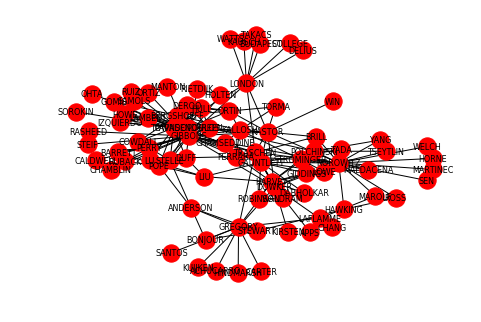

In [66]:
random_node = choice(list(G.nodes()))
b=nx.ego_graph(G, random_node, radius=3, center=False)
print('Subgrafo partiendo de un nodo aleatorio')
nx.draw(b,  with_labels = True, font_size=8)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

## 2. Distribución de Grado
Grafique la distribución del grado de los autores, en escalas lineales, semilogarítmica, y log-log. Argumente,a partir de los gráficos, de qué tipo de distribución se trata. 

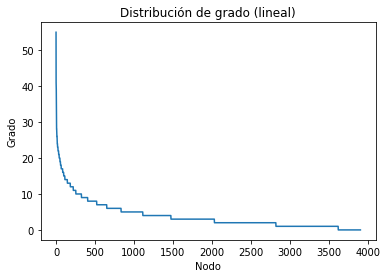

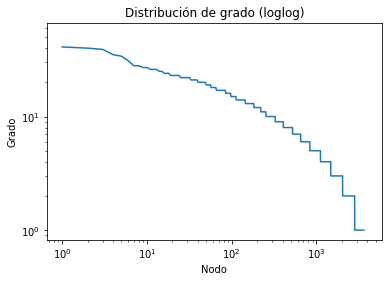

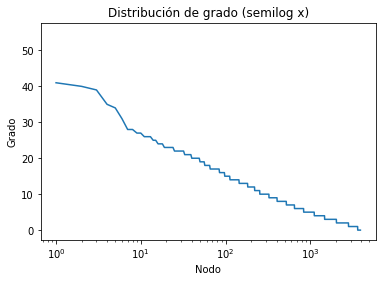

In [16]:
dg = sorted([e[1] for e in list(nx.degree(G))], reverse=True)  

plt.plot(dg)
plt.title('Distribución de grado (lineal)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_lineal.jpg', dpi=300)
#plt.close()
plt.show()

plt.loglog(dg)
plt.title('Distribución de grado (loglog)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_loglog.jpg', dpi=300)
#plt.close()
plt.show()

plt.semilogx(dg)
plt.title('Distribución de grado (semilog x)')
plt.xlabel('Nodo')
plt.ylabel('Grado')
#plt.savefig('graficos/dg_semilogx.jpg', dpi=300)
#plt.close()
plt.show()

Se trata de una distribución exponencial, porque al ser representada en una gráfica semilog en x se comporta de forma aproximadamente lineal. 

## 3. Componentes Conexas
Calcule el número de componentes conexas del grafo. Muestre el tamaño de la componente mayor, o componente gigante.

In [17]:
ncc = nx.number_connected_components(G)
print("Numero de componentes conexas: " + str(ncc))
    
    # cg es la componente gigante
cg = max(nx.connected_component_subgraphs(G), key=len)
tamcg = len(list(cg.nodes()))
print("Tamaño de la componente gigante: " + str(tamcg))

Numero de componentes conexas: 510
Tamaño de la componente gigante: 2979


## 4. Tamaños de Vecindades
Trabajando con la componente gigante del grafo, estudie, parándose en un nodo al azar, cómo aumenta
el número de autores alcanzados a medida que se aleja del nodo semilla. Grafique el número de autores
alcanzados en función de la distancia al nodo semilla. Grafique también el número de nuevos autores
que se agregan en cada paso, y estime el máximo de esta función. Pruebe con varios nodos semillas y
analice la robustez de este resultado. Discuta el significado de los gráficos y su relación con el fenómeno
de seis grados de separación.

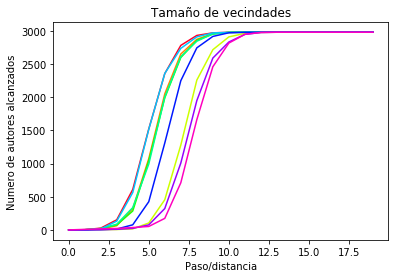

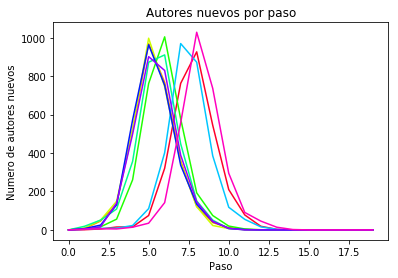

Paso asociado al mayor número de autores nuevos - valor medio de todas las iteraciones 5.77777777778


In [18]:
def tamañoVecino(cg):
    a=[]
    c=[]
    random_node = choice(list(cg.nodes()))
    for i in range (0,20):
        b=[]
        b=nx.ego_graph(cg, random_node, radius=i, center=False)
        if i==0:
            c.append(len(b))
        else:   
            c.append(len(b)-(a[i-1]))
 
        a.append(len(b))
    return a , c , c.index(max(c))

iterations=np.arange(1,10,1)
n= len(iterations)
colors = mpl.cm.gist_rainbow(np.linspace(0, 1, n))
maximos=[]

fig, ax = plt.subplots()
for color, i in zip(colors, iterations):
    ax.plot(tamañoVecino(cg)[0],color=color)
plt.title('Tamaño de vecindades')
plt.xlabel('Paso/distancia')
plt.ylabel('Numero de autores alcanzados')
#plt.savefig('graficos/tamañodeVecindades1.jpg', dpi=300)
#plt.close()
plt.show()

fig, ax1 = plt.subplots()
for color, i in zip(colors, iterations):
    ax1.plot(tamañoVecino(cg)[1],color=color)
    maximos.append(tamañoVecino(cg)[2])
plt.title('Autores nuevos por paso')
plt.xlabel('Paso')
plt.ylabel('Numero de autores nuevos')
#plt.savefig('graficos/tamañodeVecindades2.jpg', dpi=300)
#plt.close()
plt.show()

print('Paso asociado al mayor número de autores nuevos - valor medio de todas las iteraciones ' + str(np.mean(maximos)))

En ambos gráficos se evidencia que alrededor de los seis grados de separación existe una suerte de punto de inflexión en las curvas, a partir de ese valor el número de autores nuevos por paso empieza a decrecer. Por lo tanto, se evidencia que con 6 grados de separación se puede alcanzar a casi todos los nodos de la componente gigante. Esto correlaciona perfectamente con lo que se conoce como "fenómeno de los 6 grados de separación".    

## 5. Mundos Pequeños
Compute el coeficiente de clustering C y el camino mínimo medio l para la componente gigante. Genere
un grafo aleatorio con la misma distribución de grado y compute las mismas medidas para este grafo.
Compare e interprete los resultados. ¿Se trata de un grafo con estructura de mundos pequeños?

Grafo componente gigante


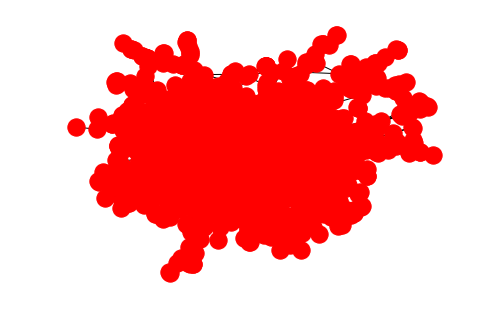

Coeficiente de clustering C para cg: 0.4788366072297226
Camino mínimo medio l para cg: 6.09230947503354


In [19]:
print('Grafo componente gigante')
nx.draw(cg)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()


C= nx.average_clustering(cg)
print("Coeficiente de clustering C para cg: " + str(C))

l=nx.average_shortest_path_length(cg)
print("Camino mínimo medio l para cg: " + str(l))   

#random graph con la misma distribucón de grado    
rg = nx.random_degree_sequence_graph(sorted([e[1] for e in list(nx.degree(cg))], reverse=True))     

Como el grafo aleatorio presenta nodos que no conectan con nada, al querer calcular el l da error, por lo tanto se va calcular las métricas de la componente gigante del grafo aleatorio

Componente gigante Random Grafo


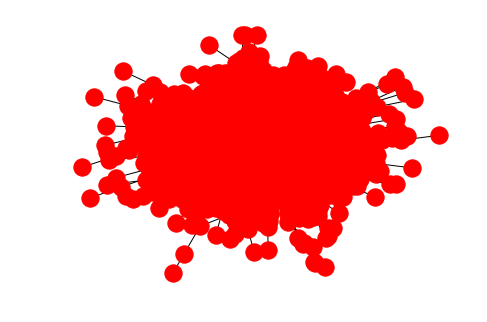

Coeficiente de clustering C para cgrg: 0.0044573431160489525
Camino mínimo medio l para cgrg: 4.756051980574394


In [20]:
cgrg = max(nx.connected_component_subgraphs(rg), key=len)

print('Componente gigante Random Grafo')
nx.draw(cgrg)  # networkx draw()
plt.draw()  # pyplot draw()
plt.show()

print("Coeficiente de clustering C para cgrg: " + str(nx.average_clustering(cgrg)))    
print("Camino mínimo medio l para cgrg: " + str(nx.average_shortest_path_length(cgrg)))

Una Red de mundo pequeño es un tipo de grafo para el que la mayoría de los nodos no son vecinos entre sí, y sin embargo la mayoría de los nodos pueden ser alcanzados desde cualquier nodo origen a través de un número relativamente corto de saltos entre ellos.

Al computar los coeficientes de clustering (C) y de camino mínimo medio (l) tanto para la componente gigante del grafo original como para la componente gigante de grafo aleatrorio, encontramos que ambas presentan un valor de l del mismo orden mientras que el C del grafo alatorio es de dos ordenes de magnitud menor. Estos resultados estarían indicando que se trata de un grafo con estructura de mundos pequeños. 

## 6. Estrellas
Discuta cómo haría para individulizar a los autores “estrella” del campo. Evalúe quiénes son estos autores
según por lo menos dos métricas diferentes. Analice qué sucedería con la comunidad si estos autores
desapareciesen. En particular, determine cuántos autores deberían desaparecer para que desaparezca
la componente gigante del grafo.

Top 5 nodos por Degree


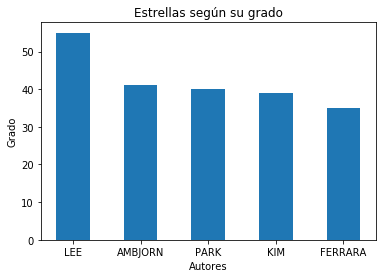

Top 5 nodos por Betweenness


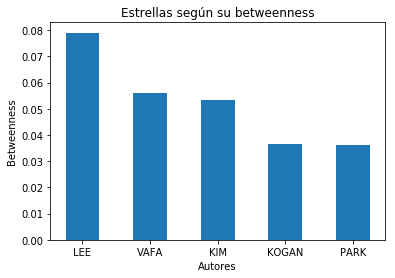

Top 5 nodos por Eigenvector


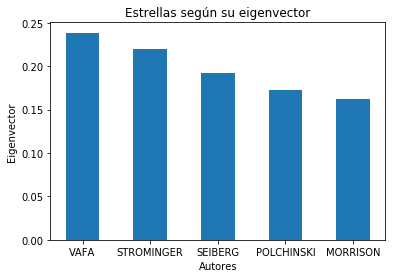

In [50]:
degree_dict = dict(cg.degree(cg.nodes())) # Run degree centrality
betweenness_dict = nx.betweenness_centrality(cg) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(cg) # Run eigenvector centrality

# Assign each to an attribute in your network
nx.set_node_attributes(cg, betweenness_dict, 'betweenness')
nx.set_node_attributes(cg, eigenvector_dict, 'eigenvector')
nx.set_node_attributes(cg, degree_dict, 'degree')

sorted_degree = sorted(degree_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_betweenness = sorted(betweenness_dict.items(), key=operator.itemgetter(1), reverse=True)
sorted_eigenvector = sorted(eigenvector_dict.items(), key=operator.itemgetter(1), reverse=True)

#top 5 nodes by degree as a list

top_degree = sorted_degree[:5]
print("Top 5 nodos por Degree")
x=[]
y=[]
for td in top_degree:
    x.append(td[0])
    y.append(td[1])
#    print("Name:", td[0], "| Degree Centrality:", td[1])


x1 = np.arange(5)
plt.bar(x1, y,0.5, align='center')
plt.xticks(x1, x)
plt.title('Estrellas según su grado')
plt.xlabel('Autores')
plt.ylabel('Grado')
plt.show()
plt.close()

#top 5 nodes by betweenness as a list
top_betweenness = sorted_betweenness[:5]


print("Top 5 nodos por Betweenness")
x=[]
y=[]
for tb in top_betweenness: # Loop through top_betweenness
    x.append(tb[0])
    y.append(tb[1])
#    print("Name:", tb[0], "| Betweenness Centrality:", tb[1])
#    degree = degree_dict[tb[0]] # Use degree_dict to access a node's degree, see footnote 2
#    eigenvector=eigenvector_dict[tb[0]]
#    print("Name:", tb[0], "| Betweenness Centrality:", tb[1], "| Degree:", degree, "| Eigenvector:", eigenvector)

x1 = np.arange(5)
plt.bar(x1, y,0.5, align='center')
plt.xticks(x1, x)
plt.title('Estrellas según su betweenness')
plt.xlabel('Autores')
plt.ylabel('Betweenness')
plt.show()
plt.close()



#top 5 nodes by eigenvector as a list
x=[]
y=[]
top_eigenvector = sorted_eigenvector[:5]
print("Top 5 nodos por Eigenvector")
for te in top_eigenvector: 
    x.append(te[0])
    y.append(te[1])
#    degree = degree_dict[te[0]] 
#    betweenness=betweenness_dict[te[0]]
#    print("Name:", te[0], "| Eigenvector Centrality:", te[1], "| Degree:", degree, "| Betweenness:", eigenvector)
x1 = np.arange(5)
plt.bar(x1, y,0.5, align='center')
plt.xticks(x1, x)
plt.title('Estrellas según su eigenvector')
plt.xlabel('Autores')
plt.ylabel('Eigenvector')
plt.show()
plt.close()

Para este ejercicio, se eligieron tres medidas de centralidad: Degree, Eigenvector y Betweenness. A continuación se explica que representan cada una de ellas.

Degree es la forma más común de identificar nodos importantes. Los nodos con mayor degree en nuestro caso, son los autores con mayor cantidad de publicaciones.

Eigenvector es como una extensión de degree, es una suerte de combinación de aristas de ese nodo y aristas de los nodos vecinos. Esta medida en nuestro caso representaria no solo la cantidad de publicaciones de ese nodo sino la cantidad de publicaciones de los nodos vecinos. De alguna forma evalúa qué nodos pueden obtener información de otros nodos más rápido.

Betweenness, por otro lado, mira todos los "caminos más cortos" que pasan por un nodo particular. Es una medida buena para identificar nodos que conectan dos partes de la red que de otra forma estarían desconectadas. Identifica nodos que son importantes no por su cantidad de conexiones, sino por ser puente entre grupos, dándole a la red conectividad y cohesión.

En las gráficas, se representan los top 5 de autores según cada una de las 3 medidad de centralidad elegidas. La estrella según Degree y Betweenness es Lee, mientras que la estrella por Eigenvector es Vafa.




In [51]:
# Esta función irá eliminando uno a uno los nodos principales según la medida de centralidad elegida
# y evaluando el numéro de nodos de la componente gigante resultante del grafo con ese nodo eliminado
# Esta función terminará su ejecución cuando el número de nodos de la componente gigante resultante sea
# la mitad del número de nodos del grafo original
def RobustezGrafo(grafo,medida):
    grafo = cg.copy()
    resultados = []
    cant_nodos = len(list(grafo.nodes()))
    cant_actual = cant_nodos
    
    if medida == 'degree':
        a=copy.deepcopy(sorted_degree)
    elif medida == 'betweenness':
        a=copy.deepcopy(sorted_betweenness)
    elif medida == 'eigenvector':
        a=copy.deepcopy(sorted_eigenvector)        
    
    
    while cant_actual>cant_nodos/2:
        resultados.append(cant_actual)
        autor = a.pop(0)
        grafo.remove_node(autor[0])
        componente=max(nx.connected_component_subgraphs(grafo), key=len)
        cant_actual = len(list(componente.nodes()))
        C= nx.average_clustering(componente)
    return resultados
    
        
        

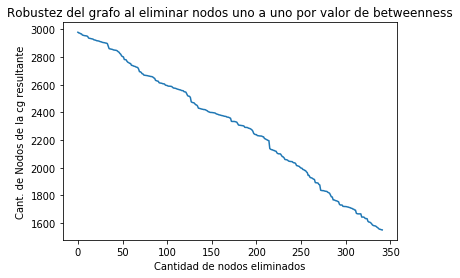

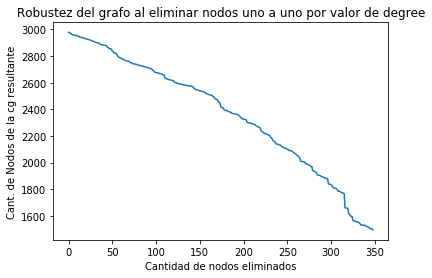

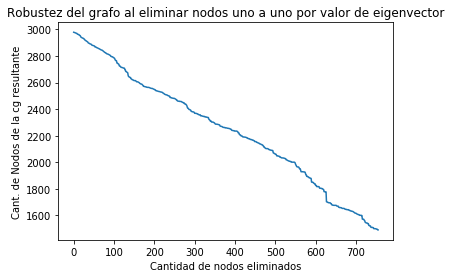

In [52]:
plt.plot(RobustezGrafo(cg,'betweenness'))
plt.title('Robustez del grafo al eliminar nodos uno a uno por valor de betweenness')
plt.xlabel('Cantidad de nodos eliminados')
plt.ylabel('Cant. de Nodos de la cg resultante')
plt.show()
plt.close()

plt.plot(RobustezGrafo(cg,'degree'))
plt.title('Robustez del grafo al eliminar nodos uno a uno por valor de degree')
plt.xlabel('Cantidad de nodos eliminados')
plt.ylabel('Cant. de Nodos de la cg resultante')
plt.show()
plt.close()
          
plt.plot(RobustezGrafo(cg,'eigenvector'))
plt.title('Robustez del grafo al eliminar nodos uno a uno por valor de eigenvector')
plt.xlabel('Cantidad de nodos eliminados')
plt.ylabel('Cant. de Nodos de la cg resultante')
plt.show()
plt.close()          
        

Para determinar cuántos autores deberían desaparecer para que desaparezca la componente gigante del grafo, consideramos que una medida para evaluar cuándo desaparece la componente gigante del grafo, era pensar en cuando la componente gigante del grafo resultante, al ir eliminando nodos, tuviese la mitad de nodos que la componente gigante original.

Y pensamos que una forma eficiente de ir eliminando nodos para hacer desaparecer la componente gigante, de forma más rápida, es ir eliminando los nodos con mayor betweenness, esto se muestra en el primer gráfico. Si bien hubiesemos esperado un decaimiento más exponencial encontramos que el mismo es mas bien lineal y esto habla de la robustez del grafo original, identificando que no tiene unos pocos "puentes" entre comunidades" sino muchos, por lo tanto el decaimiento al ir eliminando los nodos con mayor betweenness es lento.

Lo mismo ocurre si observamos las otras dos gráficas, donde se van eliminando nodos según su valor de degree y eigenvector, respectivamente. Con la particularidad de que considerando al ir eliminando nodos con mayor eigenvector recien se alcanza la mitad de los nodos de la componente gigante original, al eliminar 700 nodos.

